<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-nulls" data-toc-modified-id="Dealing-with-nulls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dealing with nulls</a></span></li><li><span><a href="#Drop-duplicates" data-toc-modified-id="Drop-duplicates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Drop duplicates</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#turning-status-in-a-number-so-we-can-correlate-with-other-numeric-feat" data-toc-modified-id="turning-status-in-a-number-so-we-can-correlate-with-other-numeric-feat-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>turning status in a number so we can correlate with other numeric feat</a></span></li><li><span><a href="#correlation-matrix" data-toc-modified-id="correlation-matrix-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>correlation matrix</a></span></li><li><span><a href="#Looking-at-the-categories---with-chi-squared,--plots-as-needed" data-toc-modified-id="Looking-at-the-categories---with-chi-squared,--plots-as-needed-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Looking at the categories - with chi squared,  plots as needed</a></span></li><li><span><a href="#outliers-spotting---using-distribution-of-numerical-features" data-toc-modified-id="outliers-spotting---using-distribution-of-numerical-features-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>outliers spotting - using distribution of numerical features</a></span></li></ul></li><li><span><a href="#split-our-data-into-three-pieces-for-pre-processing" data-toc-modified-id="split-our-data-into-three-pieces-for-pre-processing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>split our data into three pieces for pre processing</a></span><ul class="toc-item"><li><span><a href="#Encode-categories---with-getdummies" data-toc-modified-id="Encode-categories---with-getdummies-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Encode categories - with getdummies</a></span></li><li><span><a href="#Scale-numerical-columns-on-standard-scaler" data-toc-modified-id="Scale-numerical-columns-on-standard-scaler-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Scale numerical columns on standard scaler</a></span></li><li><span><a href="#concat-numerical-and-categories;" data-toc-modified-id="concat-numerical-and-categories;-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>concat numerical and categories;</a></span></li></ul></li></ul></li><li><span><a href="#Candidate-1---Logistic-Regression" data-toc-modified-id="Candidate-1---Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Candidate 1 - Logistic Regression</a></span></li><li><span><a href="#export-the-model-using-pickle" data-toc-modified-id="export-the-model-using-pickle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>export the model using pickle</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></div>

In [1]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine 
import pandas as pd
import getpass

In [2]:
mysql_pw=getpass.getpass()

········


In [3]:
connection_string='mysql+pymysql://root:'+ mysql_pw +'@localhost:3306/bank'
engine=create_engine(connection_string)

In [4]:
query = '''select t.type as trans_type,
    t.operation, 
    t.amount as t_amount, 
    t.balance, 
    t.k_symbol, 
    l.amount as l_amount, 
    l.duration, 
    l.payments, 
    l.status, 
    l.date as loan_start,
    c.type as credit_card,
    cl.birth_number,
    dt.A11 as avg_salary,
    dt.A13 as unempl_rate 

FROM 
    trans t
        LEFT JOIN            
    loan l on t.account_id = l.account_id
        LEFT JOIN
    disp d
    on t.account_id = d.account_id
        LEFT JOIN
    card c on d.disp_id = c.disp_id
        LEFT JOIN
    client cl
    on d.client_id=cl.client_id
        LEFT JOIN
        district dt
    on cl.district_id = dt.A1
WHERE l.loan_id is not null and d.type ='OWNER' and status in ('A','B');
'''

In [5]:
data = pd.read_sql_query(query, engine)
data.head()

,trans_type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status,loan_start,credit_card,birth_number,avg_salary,unempl_rate
0,PRIJEM,PREVOD Z UCTU,44749.0,45549.0,,79608,24,3317.0,A,931122,None,700428,8254,3.76
1,PRIJEM,VKLAD,1000.0,1000.0,,52788,12,4399.0,A,930915,None,730216,9045,3.60
2,PRIJEM,VKLAD,1100.0,1100.0,,21924,36,609.0,A,931110,None,600820,8743,2.43
3,PRIJEM,VKLAD,700.0,700.0,,23052,12,1921.0,A,940928,None,406101,9897,1.96
4,PRIJEM,VKLAD,900.0,900.0,,41904,12,3492.0,A,940919,None,740708,10177,7.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74364 entries, 0 to 74363
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_type    74364 non-null  object 
 1   operation     74364 non-null  object 
 2   t_amount      74364 non-null  float64
 3   balance       74364 non-null  float64
 4   k_symbol      74364 non-null  object 
 5   l_amount      74364 non-null  int64  
 6   duration      74364 non-null  int64  
 7   payments      74364 non-null  float64
 8   status        74364 non-null  object 
 9   loan_start    74364 non-null  int64  
 10  credit_card   19178 non-null  object 
 11  birth_number  74364 non-null  int64  
 12  avg_salary    74364 non-null  int64  
 13  unempl_rate   74364 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 7.9+ MB


# Cleaning

## Dealing with nulls

In [7]:
data['credit_card'].value_counts()

classic    14054
junior      2773
gold        2351
Name: credit_card, dtype: int64

In [8]:
# the nulls are in the column creditcard - lets replace
data['credit_card']= data['credit_card'].fillna('none')

## Drop duplicates

In [9]:
data= data.drop_duplicates()

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74326 entries, 0 to 74325
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_type    74326 non-null  object 
 1   operation     74326 non-null  object 
 2   t_amount      74326 non-null  float64
 3   balance       74326 non-null  float64
 4   k_symbol      74326 non-null  object 
 5   l_amount      74326 non-null  int64  
 6   duration      74326 non-null  int64  
 7   payments      74326 non-null  float64
 8   status        74326 non-null  object 
 9   loan_start    74326 non-null  int64  
 10  credit_card   74326 non-null  object 
 11  birth_number  74326 non-null  int64  
 12  avg_salary    74326 non-null  int64  
 13  unempl_rate   74326 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 7.9+ MB


## EDA
- value counts on categoricals;
- correlation;
- distribution of numbers;
- changin data types;
- drop columns;

In [12]:
data['trans_type'].value_counts()

VYDAJ     44063
PRIJEM    27634
VYBER      2629
Name: trans_type, dtype: int64

In [13]:
data['operation'].value_counts()

VYBER             34656
                  14632
PREVOD NA UCET    11646
VKLAD             10518
PREVOD Z UCTU      2484
VYBER KARTOU        390
Name: operation, dtype: int64

In [14]:
def clean_operation(x):
    if 'VYBER' in x:
        return 'VYBER'
    elif 'PREVOD' in x:
        return 'PREVOD'
    elif 'VKLAD' in x:
        return 'VKLAD'
    else: return 'UNKNOW'

In [15]:
data['operation']=data['operation'].apply(clean_operation)

In [16]:
data['operation'].value_counts()

VYBER     35046
UNKNOW    14632
PREVOD    14130
VKLAD     10518
Name: operation, dtype: int64

In [17]:
data['k_symbol'].value_counts()

               35931
UROK           14632
SLUZBY         11305
SIPO            5081
                3017
UVER            2893
POJISTNE        1159
SANKC. UROK      308
Name: k_symbol, dtype: int64

In [18]:
def clean_ksymbol(x):
    if x in ['',' ']:
        return 'UNKNOW'
    else: return x

In [19]:
data['k_symbol']=data['k_symbol'].apply(clean_ksymbol)
data['k_symbol'].value_counts()

UNKNOW         38948
UROK           14632
SLUZBY         11305
SIPO            5081
UVER            2893
POJISTNE        1159
SANKC. UROK      308
Name: k_symbol, dtype: int64

In [20]:
data['duration'].unique()

array([24, 12, 36, 48, 60], dtype=int64)

In [21]:
def clean_duration(x):
    if x >36 and x <=60:
        return 48
    else: return x

In [22]:
data['duration']=data['duration'].apply(clean_duration)
data['duration'].value_counts()

12    28733
24    25145
36    14110
48     6338
Name: duration, dtype: int64

In [23]:
%%writefile functions.py
def clean_operation(x):
    if 'VYBER' in x:
        return 'VYBER'
    elif 'PREVOD' in x:
        return 'PREVOD'
    elif 'VKLAD' in x:
        return 'VKLAD'
    else: return 'UNKNOW'
    
def clean_ksymbol(x):
    if x in ['',' ']:
        return 'UNKNOW'
    else: return x
    
def clean_duration(x):
    if x >= 60:
        return '48'
    else: return x
    
def clean_steps(data):
    data['operation']=data['operation'].apply(clean_operation)
    data['k_symbol']=data['k_symbol'].apply(clean_ksymbol)
    data['duration']=data['duration'].apply(clean_duration)

Overwriting functions.py


In [24]:
from functions import clean_operation, clean_ksymbol, clean_duration, clean_steps

In [25]:
# example - reusing the function.py file against a new data frame / sql query
# clean_stes(newdata)

### turning status in a number so we can correlate with other numeric feat

In [26]:
def is_A_status(x):
    if x=='A':
        return 1
    if x =='B':
        return 0

In [27]:
data['status']=list(map(is_A_status, data['status']))

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74326 entries, 0 to 74325
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_type    74326 non-null  object 
 1   operation     74326 non-null  object 
 2   t_amount      74326 non-null  float64
 3   balance       74326 non-null  float64
 4   k_symbol      74326 non-null  object 
 5   l_amount      74326 non-null  int64  
 6   duration      74326 non-null  int64  
 7   payments      74326 non-null  float64
 8   status        74326 non-null  int64  
 9   loan_start    74326 non-null  int64  
 10  credit_card   74326 non-null  object 
 11  birth_number  74326 non-null  int64  
 12  avg_salary    74326 non-null  int64  
 13  unempl_rate   74326 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 7.9+ MB


### correlation matrix

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
corr_matrix = data.corr(method='pearson')

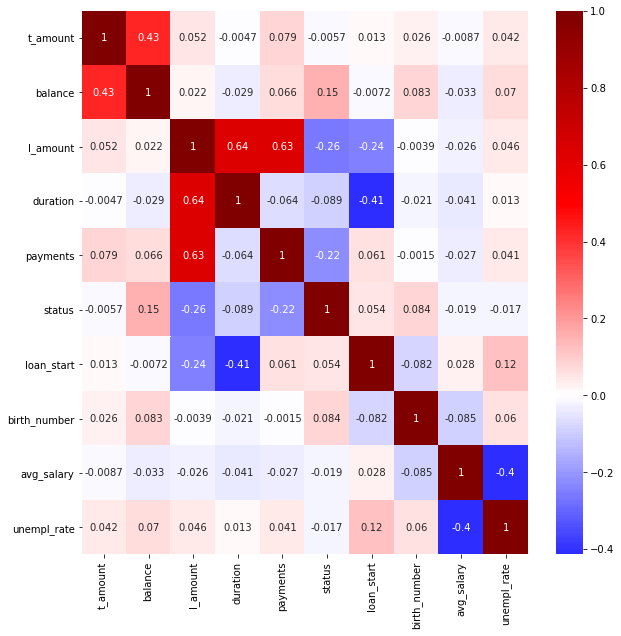

In [31]:
fix, ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix, cmap='seismic',center=0,annot=True);

### Looking at the categories - with chi squared,  plots as needed

### outliers spotting - using distribution of numerical features

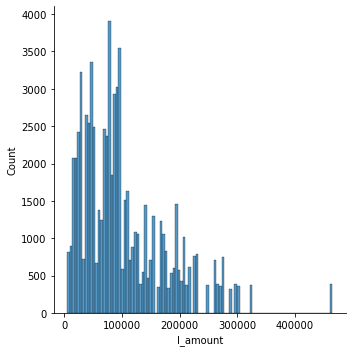

In [32]:
sns.displot(data['l_amount']);

In [33]:
data['l_amount'].describe()

count     74326.000000
mean     102761.080214
std       74763.602542
min        4980.000000
25%       46320.000000
50%       86184.000000
75%      140400.000000
max      464520.000000
Name: l_amount, dtype: float64

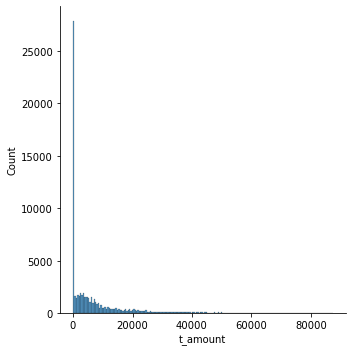

In [34]:
sns.displot(data['t_amount']);

In [35]:
data['t_amount'].value_counts()

14.6       9205
30.0       1569
100.0       604
2400.0      364
3000.0      354
           ... 
6524.0        1
8547.0        1
18735.0       1
9892.0        1
22511.0       1
Name: t_amount, Length: 12318, dtype: int64

## split our data into three pieces for pre processing
- y target label
- numeric features
- categorical features

In [36]:
y=data['status']
X=data.drop(['status'], axis=1)

In [37]:
import numpy as np

In [38]:
X_num=X.select_dtypes(include=np.number)

In [39]:
X_cat=X.select_dtypes(include=object)

In [40]:
X_num.shape

(74326, 9)

In [41]:
X_cat.shape

(74326, 4)

In [42]:
y.shape

(74326,)

### Encode categories - with getdummies

In [43]:
X_cat.head(0)

,trans_type,operation,k_symbol,credit_card


In [44]:
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True, columns=['trans_type', 'operation','k_symbol', 'credit_card'])

In [45]:
X_cat_dummies

,trans_type_VYBER,trans_type_VYDAJ,operation_UNKNOW,operation_VKLAD,operation_VYBER,k_symbol_SANKC. UROK,k_symbol_SIPO,k_symbol_SLUZBY,k_symbol_UNKNOW,k_symbol_UROK,k_symbol_UVER,credit_card_gold,credit_card_junior,credit_card_none
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74321,0,0,1,0,0,0,0,0,0,1,0,0,0,1
74322,0,0,1,0,0,0,0,0,0,1,0,0,0,1
74323,0,0,1,0,0,0,0,0,0,1,0,0,0,1
74324,0,0,1,0,0,0,0,0,0,1,0,0,1,0


### Scale numerical columns on standard scaler

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaler.fit(X_num)
X_num_scaled=scaler.transform(X_num)

In [48]:
# transforming in a dataframe
X_num_scaled_df=pd.DataFrame(X_num_scaled, columns=X_num.columns)

In [49]:
X_num_scaled_df.head(1)

,t_amount,balance,l_amount,duration,payments,loan_start,birth_number,avg_salary,unempl_rate
0,3.148862,-0.018483,-0.309686,0.027358,-0.471108,-1.426145,0.918984,-0.973407,0.117494


### concat numerical and categories;

In [50]:
X_full=pd.concat([X_cat_dummies, X_num_scaled_df], axis=1)
X_full

,trans_type_VYBER,trans_type_VYDAJ,operation_UNKNOW,operation_VKLAD,operation_VYBER,k_symbol_SANKC. UROK,k_symbol_SIPO,k_symbol_SLUZBY,k_symbol_UNKNOW,k_symbol_UROK,...,credit_card_none,t_amount,balance,l_amount,duration,payments,loan_start,birth_number,avg_salary,unempl_rate
0,0,0,0,0,0,0,0,0,1,0,...,1,3.148862,-0.018483,-0.309686,0.027358,-0.471108,-1.426145,0.918984,-0.973407,0.117494
1,0,0,0,1,0,0,0,0,1,0,...,1,-0.582496,-1.769813,-0.668419,-1.017017,0.019396,-1.444384,1.151571,-0.385304,0.045836
2,0,0,0,1,0,0,0,0,1,0,...,1,-0.573967,-1.765882,-1.081243,1.071733,-1.698728,-1.427203,0.141236,-0.609839,-0.478161
3,0,0,0,1,0,0,0,0,1,0,...,1,-0.608083,-1.781607,-1.066155,-1.017017,-1.103958,-0.562141,-1.379145,0.248152,-0.688655
4,0,0,0,1,0,0,0,0,1,0,...,1,-0.591025,-1.773745,-0.813999,-1.017017,-0.391775,-0.562934,1.233493,0.456330,1.904457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74321,0,0,1,0,0,0,0,0,0,1,...,1,-0.648912,0.078634,0.381618,1.071733,-0.321508,-0.579763,-0.331152,2.213948,-1.373882
74322,0,0,1,0,0,0,0,0,0,1,...,1,-0.648374,2.453601,0.885770,0.027358,1.217097,0.263977,1.386610,2.213948,-1.373882
74323,0,0,1,0,0,0,0,0,0,1,...,1,-0.647684,0.302082,1.068267,1.071733,0.324941,-0.617386,0.060837,-0.553333,0.968429
74324,0,0,1,0,0,0,0,0,0,1,...,0,-0.642796,1.537605,2.300318,2.116108,0.100996,-1.445177,1.547370,-0.948128,0.457868


# Candidate 1 - Logistic Regression
- Train test split and run the model:
    - test size 30%
    - import logistic regression
    - classification score
    - test size 30%
    - import logistic regression
    - classification score

In [51]:
from sklearn.linear_model import LogisticRegression # model
from sklearn.model_selection import train_test_split # train test
from sklearn.metrics import accuracy_score # evaluation

In [52]:
lr=LogisticRegression(max_iter=400) # option to tweak hyperparams

In [53]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X_full,y,test_size=0.3,random_state=40)

In [54]:
X_test.shape

(22298, 23)

In [55]:
y_test.shape

(22298,)

In [56]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [57]:
## Make prediction after training

In [58]:
y_pred=lr.predict(X_test)

In [59]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
accuracy_score(y_test,y_pred)

0.8862229796394295

# export the model using pickle

In [61]:
import pickle
import os

In [62]:
if(not os.path.exists('models')):
    os.makedirs('models')
    pickle.dump(lr,open('models/logistic_model.pkl','wb')) # wb = with binary

In [63]:
# example new data + model
models_path ='models/'
model_name=models_path + 'logistic_model.pkl'
model=pickle.load(open(model_name,'rb'))

In [64]:
model

LogisticRegression(max_iter=400)

In [65]:
# model.fit(new_data)

# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [67]:
confusion_matrix(y_test,y_pred)

array([[  613,  2324],
       [  213, 19148]], dtype=int64)

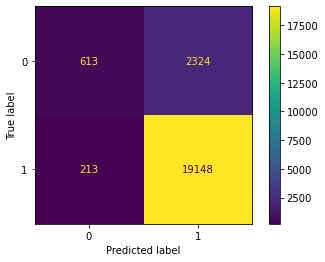

In [68]:
plot_confusion_matrix(lr,X_test, y_test);

- Amplification of machine unable to recognise minority class conditions - the base should be more balanced ( you see a big difference between 1 - 64562 and 0 - 9764), 1 and 0 should have similar values to be more precise;

In [69]:
y.value_counts()

1    64562
0     9764
Name: status, dtype: int64

In [70]:
y_train.value_counts()

1    45201
0     6827
Name: status, dtype: int64